New York Data

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import collections
from sklearn.model_selection import train_test_split

In [2]:
# special matplotlib argument for improved plots
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [3]:
crimenyc_url = "https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD"
crime_nyc = pd.read_csv(crimenyc_url)
crime_nyc.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [4]:
crime_nyc.columns

Index([u'ARREST_KEY', u'ARREST_DATE', u'PD_CD', u'PD_DESC', u'KY_CD',
       u'OFNS_DESC', u'LAW_CODE', u'LAW_CAT_CD', u'ARREST_BORO',
       u'ARREST_PRECINCT', u'JURISDICTION_CODE', u'AGE_GROUP', u'PERP_SEX',
       u'PERP_RACE', u'X_COORD_CD', u'Y_COORD_CD', u'Latitude', u'Longitude'],
      dtype='object')

In [5]:
crime_nyc.shape

(4798339, 18)

In [6]:
crime_nyc = crime_nyc[(crime_nyc.Latitude != 0) | (crime_nyc.Longitude !=0)]
crime_nyc.Latitude = pd.to_numeric(crime_nyc.Latitude, errors='coerce')
crime_nyc.Longitude = pd.to_numeric(crime_nyc.Longitude, errors='coerce')
crime_nyc.dropna(inplace=True)
crime_nyc.reset_index(inplace=True, drop=True)
crime_nyc.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [8]:
import geopandas as gp
from shapely.geometry import Point

In [9]:
geometry = gp.GeoSeries([Point(xy) for xy in zip(crime_nyc.Longitude, crime_nyc.Latitude)])
geo_crime_nyc = gp.GeoDataFrame(crime_nyc, geometry=geometry)
geo_crime_nyc.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
geo_crime_nyc.crs = {'init' :'epsg:4326'}
geo_crime_nyc.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,geometry
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,POINT (-73.715638255 40.73577180300003)
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,POINT (-73.91024071099997 40.76943659700004)
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,POINT (-73.90457153799997 40.67952470300003)
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,POINT (-73.98707442499993 40.76352297700004)
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,POINT (-73.98981129799995 40.75976844200004)


In [10]:
census_tr = gp.read_file("nyct2010_19b/nyct2010.shp")

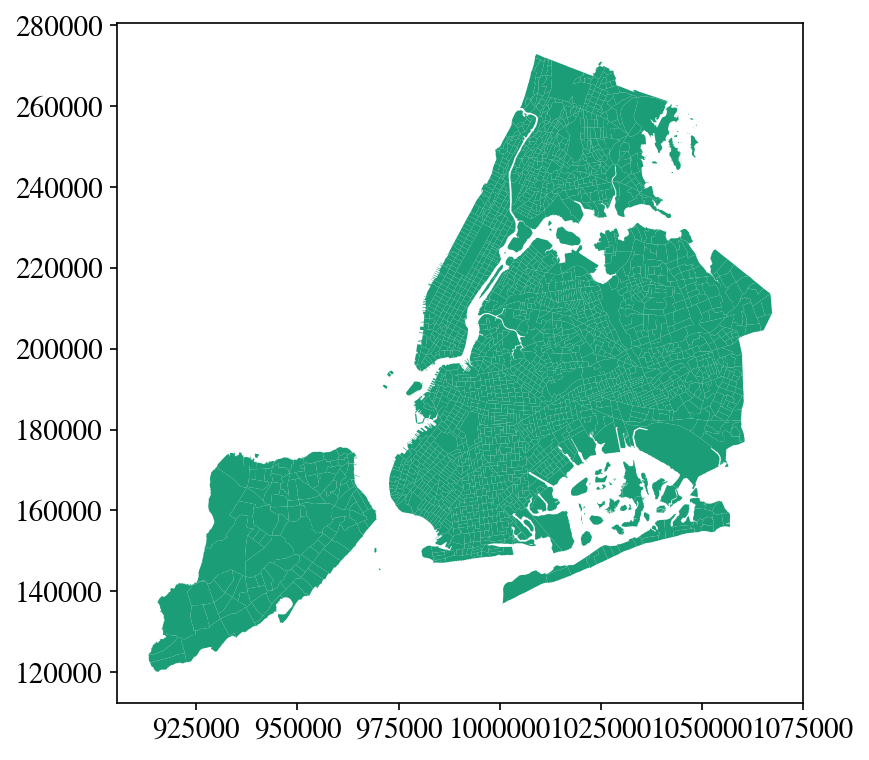

In [11]:
census_tr.plot()

In [16]:
geo_crime_nyc.crs

{'init': 'epsg:4326'}

In [19]:
census_tr.to_crs({'init' :'epsg:4326'}, inplace=True)

In [20]:
crime_nyc_census = gp.sjoin(geo_crime_nyc,census_tr, how='inner', op='within')

In [21]:
crime_nyc_census.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,...,4,Queens,157101,4157101,I,QN43,Bellerose,4105,16809.567999,1.338146e+07
13408,172459403,12/09/2017,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,105,...,4,Queens,157101,4157101,I,QN43,Bellerose,4105,16809.567999,1.338146e+07
13551,172451182,12/09/2017,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL1192AI1,I,Q,105,...,4,Queens,157101,4157101,I,QN43,Bellerose,4105,16809.567999,1.338146e+07
14361,172402769,12/08/2017,115.0,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,105,...,4,Queens,157101,4157101,I,QN43,Bellerose,4105,16809.567999,1.338146e+07
19891,172183817,12/01/2017,916.0,LEAVING SCENE-ACCIDENT-PERSONA,348.0,VEHICLE AND TRAFFIC LAWS,VTL06000AA,M,Q,105,...,4,Queens,157101,4157101,I,QN43,Bellerose,4105,16809.567999,1.338146e+07


In [22]:
from datetime import datetime

In [28]:
crime_nyc_census['ARREST_DATE'] = pd.to_datetime(crime_nyc_census['ARREST_DATE'],format="%m/%d/%Y")

In [29]:
crime_nyc_census['Week_Number'] = crime_nyc_census['ARREST_DATE'].dt.week
crime_nyc_census['Year'] = crime_nyc_census['ARREST_DATE'].dt.year

In [34]:
crime_nyc_census_2 = crime_nyc_census.groupby(['BoroCT2010','Year','Week_Number',]).agg({'ARREST_KEY':'count'})

In [86]:
crime_nyc_census_2.reset_index(inplace=True)

In [87]:
crime_nyc_census_2['Week_Number'] = crime_nyc_census_2['Week_Number'].apply(lambda x: '{0:0>2}'.format(x))

In [88]:
crime_nyc_census_2['year_week']= (crime_nyc_census_2['Year'].astype(str) + '/' + crime_nyc_census_2['Week_Number'].astype(str))

In [89]:
crime_nyc_census_2.head()

,index,BoroCT2010,Year,Week_Number,ARREST_KEY,year_week
0,0,1000201,2006,01,2,2006/01
1,1,1000201,2006,02,4,2006/02
2,2,1000201,2006,05,1,2006/05
3,3,1000201,2006,06,5,2006/06
4,4,1000201,2006,07,3,2006/07


In [90]:
pivoted = crime_nyc_census_2.pivot(index='BoroCT2010', columns='year_week', values='ARREST_KEY').reset_index()

In [92]:
pivoted.columns.name=None

In [93]:
pivoted.head()

,BoroCT2010,2006/01,2006/02,2006/03,2006/04,2006/05,2006/06,2006/07,2006/08,2006/09,...,2018/43,2018/44,2018/45,2018/46,2018/47,2018/48,2018/49,2018/50,2018/51,2018/52
0,1000201,2.0,4.0,NaN,NaN,1.0,5.0,3.0,2.0,2.0,...,6.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1000202,NaN,7.0,3.0,2.0,2.0,3.0,3.0,4.0,6.0,...,3.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,6.0
2,1000600,11.0,9.0,5.0,6.0,10.0,7.0,4.0,7.0,20.0,...,2.0,5.0,1.0,1.0,7.0,3.0,NaN,1.0,4.0,6.0
3,1000700,NaN,1.0,4.0,3.0,NaN,2.0,NaN,NaN,1.0,...,NaN,2.0,4.0,1.0,1.0,1.0,NaN,NaN,3.0,NaN
4,1000800,4.0,6.0,12.0,11.0,9.0,12.0,5.0,14.0,6.0,...,5.0,8.0,NaN,2.0,1.0,4.0,2.0,7.0,11.0,1.0


In [94]:
pivoted.fillna(0)

,BoroCT2010,2006/01,2006/02,2006/03,2006/04,2006/05,2006/06,2006/07,2006/08,2006/09,...,2018/43,2018/44,2018/45,2018/46,2018/47,2018/48,2018/49,2018/50,2018/51,2018/52
0,1000201,2.0,4.0,0.0,0.0,1.0,5.0,3.0,2.0,2.0,...,6.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000202,0.0,7.0,3.0,2.0,2.0,3.0,3.0,4.0,6.0,...,3.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,6.0
2,1000600,11.0,9.0,5.0,6.0,10.0,7.0,4.0,7.0,20.0,...,2.0,5.0,1.0,1.0,7.0,3.0,0.0,1.0,4.0,6.0
3,1000700,0.0,1.0,4.0,3.0,0.0,2.0,0.0,0.0,1.0,...,0.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0
4,1000800,4.0,6.0,12.0,11.0,9.0,12.0,5.0,14.0,6.0,...,5.0,8.0,0.0,2.0,1.0,4.0,2.0,7.0,11.0,1.0
5,1000900,5.0,1.0,2.0,2.0,1.0,5.0,3.0,1.0,2.0,...,7.0,3.0,3.0,1.0,2.0,4.0,6.0,6.0,5.0,0.0
6,1001001,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1001002,5.0,5.0,1.0,2.0,1.0,2.0,11.0,5.0,1.0,...,1.0,0.0,3.0,1.0,0.0,3.0,4.0,0.0,3.0,1.0
8,1001200,12.0,5.0,9.0,12.0,18.0,11.0,20.0,14.0,15.0,...,10.0,13.0,9.0,22.0,6.0,22.0,9.0,12.0,10.0,5.0
9,1001300,10.0,20.0,23.0,25.0,15.0,9.0,15.0,35.0,23.0,...,13.0,12.0,8.0,12.0,8.0,17.0,15.0,17.0,15.0,9.0


In [98]:
pivoted.to_csv('nyc_crime.csv', encoding='utf-8', index=False)

In [ ]:
import geopandas as gp
from shapely.geometry import Point